Aby uaktywnić widgety należy użyć magicznej komendy (magic command z interaktywnego Pythona) `%matplotlib widget` oraz zaimportować prostą bibliotekę ipywidget. Biblioteka działa tylko z jupyter lab. Są do widety z biblioteki `tkinker`.

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

Prosta funkcja wyświetlająca napis, gdzie imię jest zmieniane w zależności od widgetu.

In [2]:
def imiona(name):
    """
    Print the current widget value in short sentence
    """
    print(f'Na imię mam {name}')
     
widgets.interact(imiona, name=["Anna", "Ewa", "Monika"]);

interactive(children=(Dropdown(description='name', options=('Anna', 'Ewa', 'Monika'), value='Anna'), Output())…

Dobór widgetu jest automatyczny:
* Jeżeli modyfikowana wartość jest przekazana w formie listy budowana jest lista wyboru (dropdown)
* Jeżeli modyfikowana wartość jest przekazana w formie krotki (min,max,step) tworzony jest slider
* Jeżeli modyfikowana wartość jest przekazana w formie True/False tworzony jest checkbox

Taki zestaw pozwala obsłużyć trzy główne typy wyboru: kategorie, wartości i flagi

In [3]:
def interakcje(x):
    """
    Print the current widget value in short sentence
    """
    print(f'Wynik: {x}')
 
widgets.interact(interakcje, x=[0, 1, 2, 3])
widgets.interact(interakcje, x=(0, 10, 1))
widgets.interact(interakcje, x=(0, 10, .5))
_ = widgets.interact(interakcje, x=True)

interactive(children=(Dropdown(description='x', options=(0, 1, 2, 3), value=0), Output()), _dom_classes=('widg…

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

interactive(children=(FloatSlider(value=5.0, description='x', max=10.0, step=0.5), Output()), _dom_classes=('w…

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

Można również obsługiwać zestawy wielu zmiennych, w takiej sytuacji funkcja powinna zwracać krotkę

In [4]:
def three(j, p, b):
    return (j, p, b)
 
_ = widgets.interact(
    three, 
    j=(0, 10, 1), 
    p=True, 
    b=['a', 'b', 'c']
)

interactive(children=(IntSlider(value=5, description='j', max=10), Checkbox(value=True, description='p'), Drop…

Dowolną funkcję można zmieniać w funkcję interaktywną poprzez dodanie dekoratora `@widgets.interact(x=..)`, gdzie x będzie odpowiednio listą, krotką lub wartością logiczną

In [5]:
@widgets.interact(x=['a','n','m'])
def cos(x):
    """
    Print the current widget value in short sentence
    """
    print(f'Wynik: {x}')

interactive(children=(Dropdown(description='x', options=('a', 'n', 'm'), value='a'), Output()), _dom_classes=(…

Prosty przykład jak zbudować wykres interaktywny przy pomocy interakcji:

* podstawą jest funkcja realizująca wykres. Funkcja zawiea dane wejściowe oraz parametry. Należy sprawdzić funkcję na parametrach statycznych
* utworzyć funkcję update(), zawierającą parametry sterujące, która
  * usunie wyrysowane elemety (`remove`)
  * narysuje elementy na nowo wywołując wartości x i y
  * dodać do funkcji dekorator, który będzie wywoływał fukcję przy każdej zmianie parametru
  * 

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

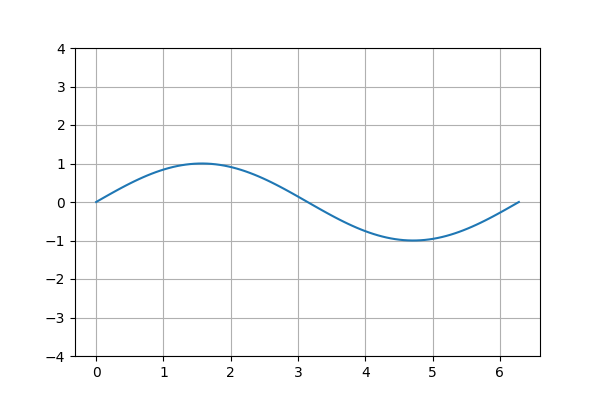

In [6]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
 
def my_sine(x, w, amp, phi):
    """
    wylicz y dla plot
    """
    return amp*np.sin(w * (x-phi))
 
 
@widgets.interact(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))
def update(w = 1.0, amp=1, phi=0):
    """usuń istniejące elementy"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

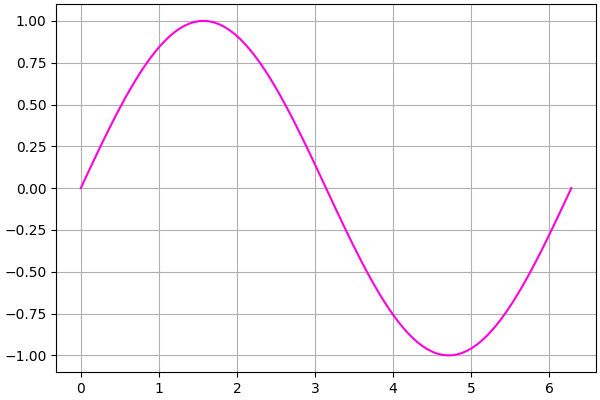

In [7]:
output = widgets.Output()
 
#Dane
x = np.linspace(0, 2 * np.pi, 100)
 
# default line color
initial_color = '#FF00DD'
 
with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
     
# move the toolbar to the bottom
#fig.canvas.toolbar_position = 'bottom'
ax.grid(True)    
line, = ax.plot(x, np.sin(x), initial_color)

In [8]:
# Złożone widgety
int_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description='częstotliwość')
color_picker = widgets.ColorPicker(value=initial_color, description='wybierz kolor')
text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)
 
# callback functions
def update(change):
    """redraw line (update plot)"""
    line.set_ydata(np.sin(change.new * x)) # chage jest elementem obsługi
    fig.canvas.draw()
     
def line_color(change):
    """set line color"""
    line.set_color(change.new)
     
def update_xlabel(change):
    ax.set_xlabel(change.new)
     
def update_ylabel(change):
    ax.set_ylabel(change.new)
 
# connect callbacks and traits
int_slider.observe(update, 'value')
color_picker.observe(line_color, 'value')
text_xlabel.observe(update_xlabel, 'value')
text_ylabel.observe(update_ylabel, 'value')
 
text_xlabel.value = 'x'
text_ylabel.value = 'y'

In [9]:
controls = widgets.VBox([int_slider, color_picker, text_xlabel, text_ylabel])
widgets.HBox([controls, output])

ZDANIE: wybrany wykres z poprzednich zajęć zamienić w fukcję interaktywną zmieniającą wygląd wykresu

https://kapernikov.com/ipywidgets-with-matplotlib/

https://spatialthoughts.com/2022/01/14/animated-plots-with-matplotlib/